# ML-1 Assignment

## Problem 1:
### Task 1
https://www.kaggle.com/code/sanidhyas3s/linear-regression-p1t1/notebook
 

### Task 2
https://www.kaggle.com/code/sanidhyas3s/polynomial-regression-p1t2/notebook

## Problem 2:


In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score as acc
import random

A header row has been added to the datafiles manually.

In [9]:
tr_data = pd.read_csv('pendigitstra')
ts_data = pd.read_csv('pendigitstes')
tr_data.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,digit
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [33]:
tr=np.array(tr_data)
ts=np.array(ts_data)
tr

array([[ 47, 100,  27, ...,  40,  98,   8],
       [  0,  89,  27, ..., 100,   6,   2],
       [  0,  57,  31, ...,  16,   0,   1],
       ...,
       [100,  98,  60, ...,   0,   5,   5],
       [ 59,  65,  91, ..., 100,   0,   1],
       [  0,  78,  29, ..., 100,  40,   7]])

### Task 1

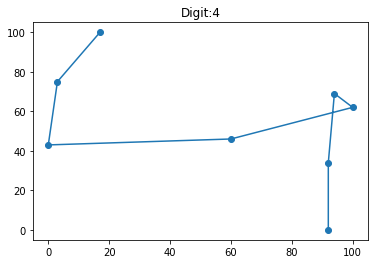

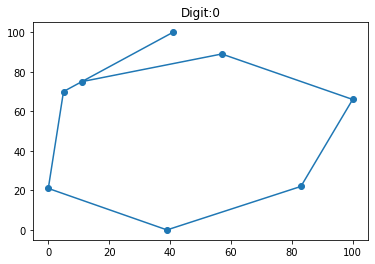

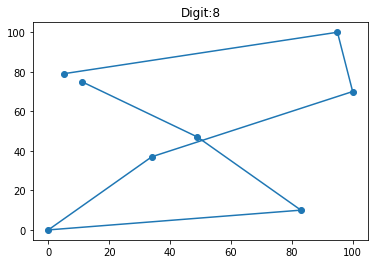

In [38]:
def sketch(arr):
    digit_x=np.array([arr[i] for i in range(0,16,2)])
    digit_y=np.array([arr[i] for i in range(1,16,2)])
    digit_label=arr[16]
    pl.scatter(digit_x,digit_y)
    pl.plot(digit_x,digit_y)
    pl.title('Digit:%i'%digit_label)
    pl.show()
    
def sketchx(x):
    i=random.randint(1,7000)
    while(True):
        if (tr[i][16]==x):
            sketch(tr[i])
            return
        i+=1
        
sketchx(4)
sketchx(0)
sketchx(8)

Note: different 4,0,8s are generated on each run

### Task 2

#### Training the model:

In [35]:
tr_input=np.array(tr_data.drop(['digit'],1))
tr_label=np.array(tr_data['digit'])

model=LR(max_iter=10**8).fit(tr_input,tr_label)

/tmp/ipykernel_303/2120424367.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr_input=np.array(tr_data.drop(['digit'],1))
/home/sanidhyas3s/anaconda3/envs/sanidhya/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
ts_input=np.array(ts_data.drop(['digit'],1))
ts_label=np.array(ts_data['digit'])

tr_pred_label=model.predict(tr_input)
print('Accuracy on training data: ',acc(tr_label,tr_pred_label))
ts_pred_label=model.predict(ts_input)
print('Accuracy on test data: ',acc(ts_label,ts_pred_label))

Accuracy on training data:  0.9713103816386442
Accuracy on test data:  0.9271012006861064


/tmp/ipykernel_303/690477054.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ts_input=np.array(ts_data.drop(['digit'],1))


### Task 3

In [87]:
class KNN:
    def __init__(self,k):
        self.k=k

    def load(self,tr_data):
        self.data=tr_data
    
    def distance(self,p1,p2):
        saved=p2[-1]
        p2[-1]=0
        difference=np.absolute(p1-p2)
        distance=np.zeros((len(difference),2))
        for i in range(len(difference)):
            for j in range(16):
                distance[i][0]+=difference[i][j]
            distance[i][1]=difference[i][-1]
        p2[-1]=saved          
        return distance
    
    def predict(self, test_pt):
        dist_n_label=KNN.distance(self,self.data,test_pt).transpose()
        counter=np.zeros((10))
        for i in range(self.k):
            counter[int(dist_n_label[1][np.argmin(dist_n_label[0])])]+=1
            dist_n_label=np.delete(dist_n_label,np.argmin(dist_n_label[0]),1)
        prediction=np.argmax(counter)
        return prediction
    
    def accuracy(self,ts):
        correct_count=0
        for i in range(len(ts)):
            correct_count+=(self.predict(ts[i])==ts[i][-1])
        return correct_count/len(ts)

    def __call__(self):
        print('This is a KNN model with k set to',self.k,'.')

Note: The above implementation of KNN is not generalisable and is made just to work for this dataset.

In [88]:
knn1=KNN(1)
knn1.load(tr) #to clarify tr is the np array burrowed from the previous task
knn1()

This is a KNN model with k set to 1 .


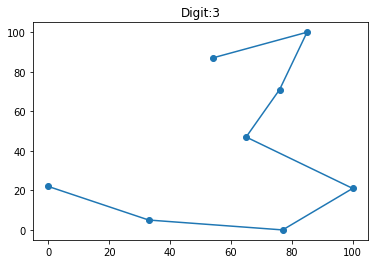

The digit predicted by the model:  3


In [89]:
sketch(ts[123])
print("The digit predicted by the model: ",knn1.predict(ts[123]))

In [90]:
'''since the running time for finding accuracy is quite high if we use the entire test data,
we only use the first t samples for finding accuracy'''
t=200
print("Accuracy on partial test data of model with k=1 is",knn1.accuracy(ts[:t]))

Accuracy on partial test data of model with k=1 is 0.98


### Task 4

In [93]:
ks,accuracies = range(1,11),np.zeros(10)
for i in range(1,11):
    knni=KNN(i)
    knni.load(tr)
    knni()
    accuracies[i-1]=knni.accuracy(ts[:t])

This is a KNN model with k set to 1 .
This is a KNN model with k set to 2 .
This is a KNN model with k set to 3 .
This is a KNN model with k set to 4 .
This is a KNN model with k set to 5 .
This is a KNN model with k set to 6 .
This is a KNN model with k set to 7 .
This is a KNN model with k set to 8 .
This is a KNN model with k set to 9 .
This is a KNN model with k set to 10 .


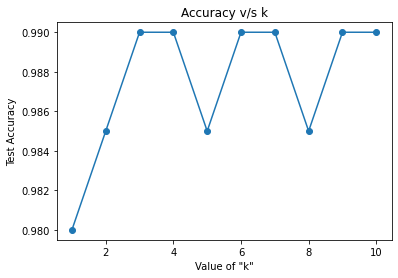

In [94]:
pl.scatter(ks,accuracies)
pl.plot(ks,accuracies)
pl.xlabel("Value of \"k\"")
pl.ylabel("Test Accuracy")
pl.title("Accuracy v/s k")
pl.show()

### Task 5

> To decide the hyperparameteres using the test accuracy is not the best way. Why?

To repeatedly tune the hyperparameters on the same test data is not the most ideal way for tuning hyperparameters, because the hyperparameters make the model somewhat overfit on the data, they were tuned on. We are basically be choosing the hyperparameters which perform the best on a specific dataset which might not generalise to other datasets.
The better alternative is to use cross-validation.